In [1]:
###NOTAS###

#substituir base de dados por novo BW - OK
#ler a base                           - OK
#verificar valores unicos             - OK
#filtrar valores que fazem sentido    - OK
#agrupar informações                  - OK
#montar função para graficar          - OK
#fazer gráfico de pizza e acrescentar rótulos - OK

In [2]:
#importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Leer la base
ventas=pd.DataFrame(pd.read_csv("C:\\FCD\\PythonFundamental_Femsa\\ventas_caso_final.csv"))

In [5]:
#Visualizar los datos
ventas.head()

,Categoria,Tipo_Consumo,Estado,Canal,GEC,Vol_UC,Receita_Bruta
0,REFRIG,SS,GO,INDIRETOS,INDIRETOS,340821,9701781
1,REFRIG,SS,MG,HIPER & SUPER,DIAMANTE,831185,25411641
2,REFRIG,SS,MG,HIPER & SUPER,OURO,114325,3612316
3,REFRIG,SS,MG,HIPER & SUPER,PRATA,99445,3260881
4,REFRIG,SS,MG,HIPER & SUPER,BRONZE,1209,29719


In [6]:
#Número de Registros
ventas.count()

Categoria        4673
Tipo_Consumo     4673
Estado           4673
Canal            4673
GEC              4673
Vol_UC           4673
Receita_Bruta    4673
dtype: int64

In [73]:
#creación variable precio
ventas["Preço"]=ventas["Receita_Bruta"]/ventas["Vol_UC"]
ventas.head()

,Categoria,Tipo_Consumo,Estado,Canal,GEC,Vol_UC,Receita_Bruta,Preço
0,REFRIG,SS,GO,INDIRETOS,INDIRETOS,340821,9701781,28.465913
1,REFRIG,SS,MG,HIPER & SUPER,DIAMANTE,831185,25411641,30.572786
2,REFRIG,SS,MG,HIPER & SUPER,OURO,114325,3612316,31.596904
3,REFRIG,SS,MG,HIPER & SUPER,PRATA,99445,3260881,32.790799
4,REFRIG,SS,MG,HIPER & SUPER,BRONZE,1209,29719,24.581472


In [75]:
#Total VOL UC antes de limpiar los datos
V0 = ventas["Vol_UC"].sum()
V0

500738835

In [76]:
np.unique(ventas["Tipo_Consumo"]) #check Tipo de Consumo ---> NAO BEBIDA é out of scope

array(['MS', 'NAO BEBIDA', 'SS'], dtype=object)

In [77]:
np.unique(ventas["Estado"]) #check Estado ---> GO-Goiás, DF-Distrito Federal e RJ-Rio de Janeiro são Out of Scope

array(['DF', 'GO', 'MG', 'MS', 'PR', 'RJ', 'RS', 'SC', 'SP'], dtype=object)

In [78]:
np.unique(ventas["Canal"]) #check Canal ---> OK

array(['C-STORE', 'DIFERENCIADOS', 'FAST FOOD', 'HIPER & SUPER',
       'INDIRETOS', 'MERCADO FRIO', 'OUTROS', 'TRADICIONAL',
       'VENDING MACHINE'], dtype=object)

In [79]:
np.unique(ventas["GEC"]) #check GEC ---> Sem Atribuir é out of scope

array(['BRONZE', 'CUSTOMIZADO', 'DIAMANTE', 'INDIRETOS', 'OURO', 'PRATA',
       'SEM ATRIBUIR'], dtype=object)

In [94]:
#Filtrar somente datos in scope
ventas_tc = ventas[ventas["Tipo_Consumo"]!="NAO BEBIDA"]
ventas_est1= ventas_tc[ventas_tc["Estado"]!='DF']
ventas_est2= ventas_est1[ventas_est1["Estado"]!='GO']
ventas_est3= ventas_est2[ventas_est2["Estado"]!='RJ']
ventas_can= ventas_est3[ventas_est3["GEC"]!='SEM ATRIBUIR']

In [95]:
#CHECK 2.1 DE VALORES Tipo Consumo
np.unique(ventas_can["Tipo_Consumo"]) #Consumo OK

array(['MS', 'SS'], dtype=object)

In [96]:
#CHECK 2.2 DE VALORES Estado
np.unique(ventas_can["Estado"]) #Estado OK

array(['MG', 'MS', 'PR', 'RS', 'SC', 'SP'], dtype=object)

In [97]:
#CHECK 2.3 DE VALORES GEC
np.unique(ventas_can["GEC"]) #GEC OK

array(['BRONZE', 'CUSTOMIZADO', 'DIAMANTE', 'INDIRETOS', 'OURO', 'PRATA'],
      dtype=object)

In [98]:
#Nuevo size del DF despues de limpiar la base
ventas_can.count()

Categoria        3461
Tipo_Consumo     3461
Estado           3461
Canal            3461
GEC              3461
Vol_UC           3461
Receita_Bruta    3461
Preço            3461
dtype: int64

In [99]:
#volumen despues de limpiar la base
V1 = ventas_can["Vol_UC"].sum()

In [100]:
print("La perdida de Informacion és de " + str(round(100*(V1/V0-1),1)) +"%")

La perdida de Informacion és de -2.5%


In [135]:
#Funcion para graficar los indicadores por el grupo de interes.
#Hizo con Tipo de Consumo y Precio pero se puede hacer con otros ejemplos
def grafbar(indicador,grupo):
    base_grupo = ventas_can.groupby(grupo).mean()
    base_grupo["Preço"] = base_grupo["Receita_Bruta"]/base_grupo["Vol_UC"]
    base_grupo[indicador].plot(kind="bar",title= indicador +" por "+grupo).legend()

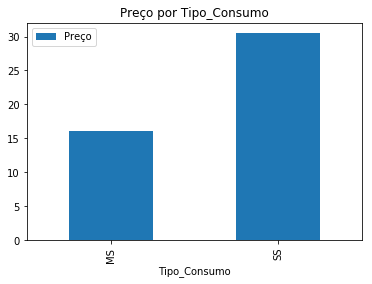

In [268]:
#hago una gráfica para provar que el Precio de SS és mayor que MS
grafbar("Preço","Tipo_Consumo")

In [126]:
#tambien se pude ver la info en una grafica Pie, para ver donde está el mayor ingresso
def piegraf (grupo,indicador):
    a= ventas_can.groupby(grupo).sum()
    a[indicador].plot.pie(figsize=(10,10),title=indicador + " por " + grupo,autopct="%0.1f").legend()

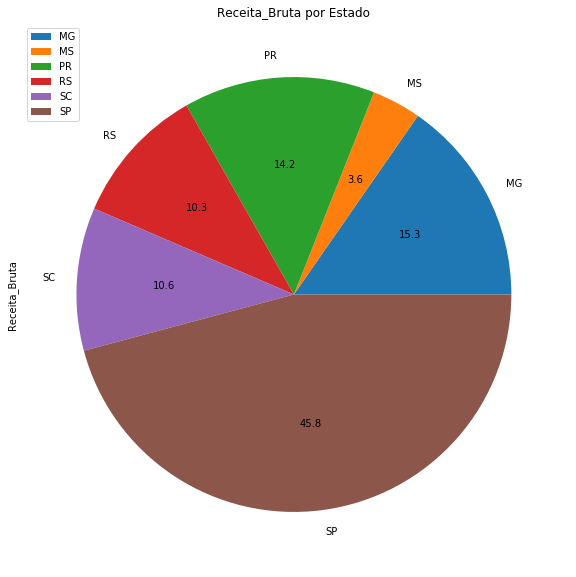

In [269]:
piegraf("Estado","Receita_Bruta")

In [223]:
#Funcion que trae solamente los datos de Ingresso de Tipo de Consumo SS a nivel Estado y un estimado de cual seria
#el ingresso incremental si el volumen crece 1%
def beneficio_ss(dimensao):
    tc_ss = ventas_can[ventas_can["Tipo_Consumo"]=="SS"].groupby(dimensao).sum()["Receita_Bruta"]
    print(tc_ss*0.01)

In [224]:
beneficio_ss("Categoria")
#Al hacer los ejercicios para cada dimension, és posible ver que los mayores beneficios estan en
#Categoria: CSD, R$MM 28,4
#Estado:    SP, R$MM 22,0
#GEC:       Customizado, R$MM 19,1
#Canal:     Hiper & Super, R$MM 15,8

Categoria
AGUA             2464575.48
CERVEJA          7553220.42
CHAS              564677.75
ENERGETICO       5446553.96
HIDROTONICO       456442.88
ISOTONICO         242078.99
LACTEO                -0.78
MIXED DRINKS       89272.50
REFRIG          28371401.68
SOJA              237290.48
SUCOS            1976394.32
ÁGUA DE COCO           1.50
Name: Receita_Bruta, dtype: float64


In [257]:
#si se quiere hacer un deep dive en CSD, SP,Hiper & Super, Customizado,  se puede...
detalle = ventas_can[ventas_can["Tipo_Consumo"]=="SS"]
dive = detalle.groupby(["Estado","Canal","GEC"]).sum()["Receita_Bruta"]
dive["SP","HIPER & SUPER","CUSTOMIZADO"]*0.01

3937094.89

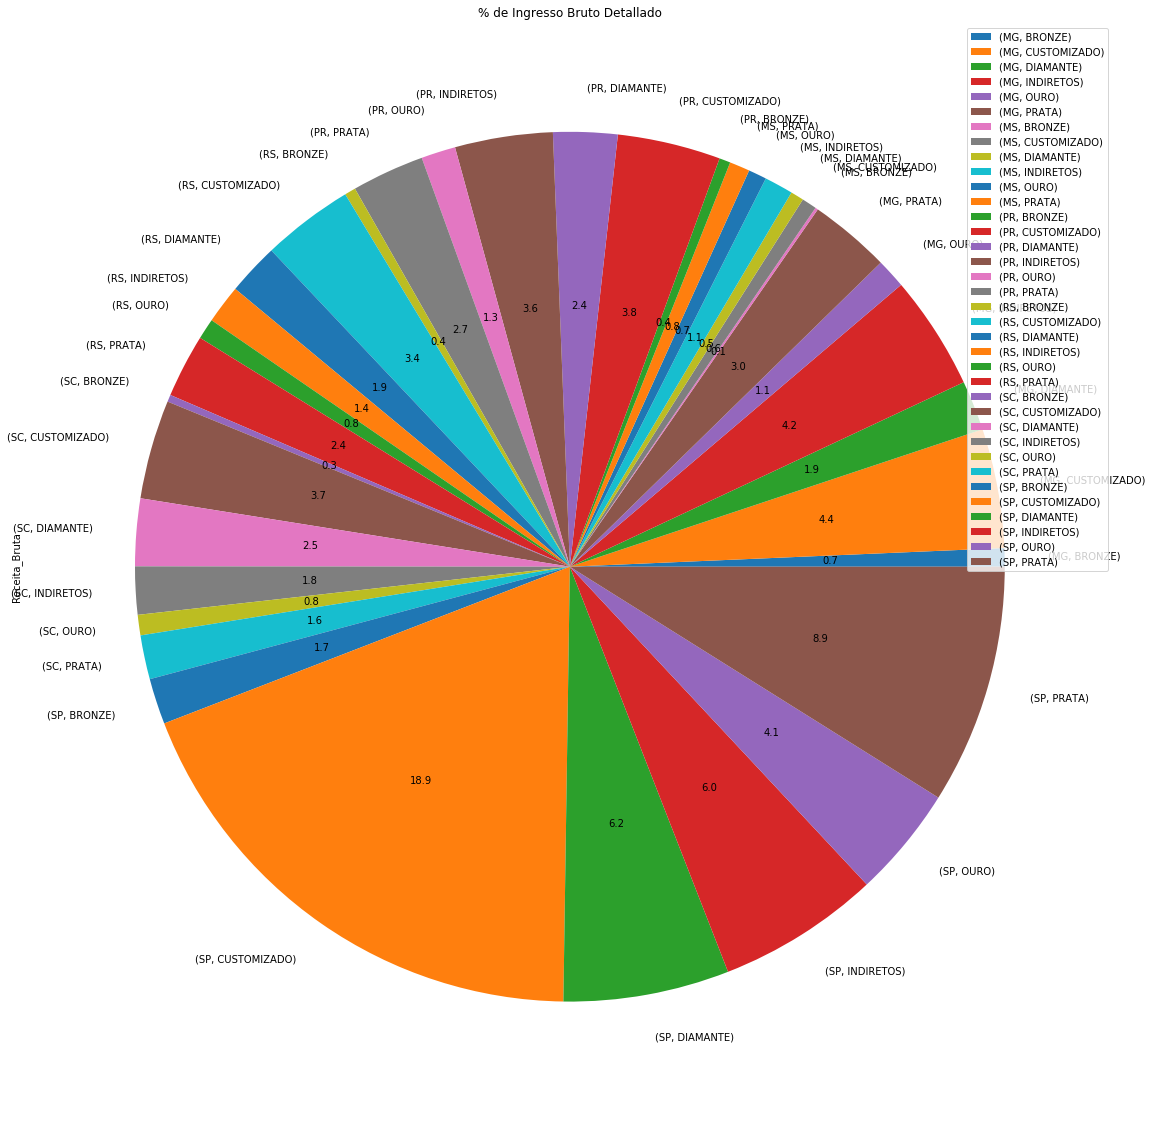

In [263]:
#y tambien se puede hacer un plot mas al detalle
plotdet = ventas_can.groupby(["Estado","GEC"]).sum()["Receita_Bruta"]
plotdet.plot.pie(figsize=(20,20),autopct="%0.1f",title="% de Ingresso Bruto Detallado").legend()